<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Other_resolution/Image_Load_and_Save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
import cv2
import zipfile
from google.colab import files
#import random
from random import randint
from skimage import filters
from PIL import Image
import re
import skimage
import pandas as pd
import sklearn
from scipy import ndimage as ndi
from skimage import feature
from skimage import measure

In [2]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/MarquesGabi_Routines


In [3]:
Size = 28
img_name=[]
xw=[]
ww=[]
Transfere = 'Fotos_amostras_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [4]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)

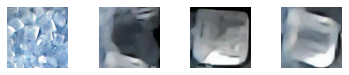

In [5]:
# Determine the (random) indexes of the images that you want to see 
indice = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(indice)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[indice[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [6]:
from skimage.measure import label, regionprops, regionprops_table
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

In [7]:
imagexx = images[36]
imagexx = color.rgb2gray(imagexx)
label_img = label(imagexx)
regions = regionprops(label_img)

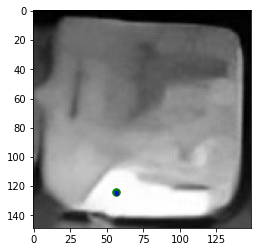

In [9]:
fig, ax = plt.subplots()
ax.imshow(imagexx, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

#ax.axis((0, 600, 600, 0))
plt.show()